To use: Random Forest, SVM, ADABoost

# Card company:

-Can I establish a marketing and origination strategy around who to target for this product? 
    
Why a prepaid card over a regular credit card?
 * “To gain control of their finances, avoid overspending and overdraft fees,” said Pew’s Alex Horowitz. “This way they know they can put a certain amount on the card and spend that and no more.” https://www.cnbc.com/2014/02/07/why-prepaid-debit-cards-are-appealing-to-so-many.html
    
    
-Find the features that coorelate the most with use of pre-paid cards. Use card use as label.

-Use classification models for this (Random Forest Classifier, SVM, Logit, etc.)

-Use 20 variables related to spending habits instead of demographics?

-Draw any key insights related to usage likelihood of pre-paid cards. 

-Maybe also look at the median/mean responses and see which are above average?
        
# CFPB: 

-At risk of taking on a product that has excessive fees and that they can end up overpaying for.

-Given potential high fees, and concerns related to unsophisticated users can we identify at-risk groups? 
    
Flip the questions: Can education help? Poor management?

-What policies can we prescribe to protect such groups
    
-Unaware/uneducated in terms of finances or have poor spending habits. 

#Card company variables:


#Used credit card alternatives in past:

PRODUSE_1 Used payday loan or cash advance loan

PRODUSE_2 Used pawn loan or auto title loan

>Label: PRODUSE_3 Used reloadable card not linked with checking or savings account

PRODUSE_4 Used nonbank service for international money transfers

PRODUSE_5 Used nonbank service for check cashing or purchasing a money order

PRODUSE_6 Respondent did not select any item in PRODUSE bank


#Had issues with credit cards (non-prepaid) in the past

CONSPROTECT1 Frequency felt not respected or mistreated w/ financial services

CONSPROTECT2 Familiarity w/ agencies and orgs to resolve problems w/ financial services

CONSPROTECT3 Reported problem to one of these agencies or orgs

REJECTED_1 I applied for credit and was turned down

REJECTED_2 I did not apply for credit because I thought would be turned down


#Self control?

SELFCONTROL_1 I often act without thinking through all the alternatives

SELFCONTROL_2 I am good at resisting temptation

SELFCONTROL_3 I am able to work diligently toward long-term goals

CHANGEABLE Belief that ability to manage money is NOT changeable

GOALCONF Confidence in own ability to achieve financial goals


#Personal Financial management 

MANAGE1_1 Paid all your bills on time

MANAGE1_2 Stayed within your budget or spending plan

MANAGE1_3 Paid off credit card balance in full each month

MANAGE1_4 Checked your statements, bills and receipts to make sure there were no errors

In [2]:
# Get all the data from UCI_Credit_Card file
import pandas as pd
wellness_data = pd.read_csv('CFPB-financial-wellness-data.csv',  header=0)
wellness_data.head()

card_select = ['PRODUSE_1', 'PRODUSE_2', 'PRODUSE_3', 'PRODUSE_4', 'PRODUSE_5', 
               'PRODUSE_6', 'CONSPROTECT1', 'CONSPROTECT2', 'CONSPROTECT3', 'REJECTED_1',
              'REJECTED_2', 'SELFCONTROL_1', 'SELFCONTROL_2', 'SELFCONTROL_3', 'CHANGEABLE',
              'GOALCONF', 'MANAGE1_1', 'MANAGE1_2', 'MANAGE1_3', 'MANAGE1_4']

wellness_data_card = wellness_data[card_select]

wellness_data_card.head()

inverse_produse6 = [1 if i is not 1 else 0 for i in wellness_data_card['PRODUSE_6']]

wellness_data_card['PRODUSE_6_INVERSE'] = inverse_produse6

/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


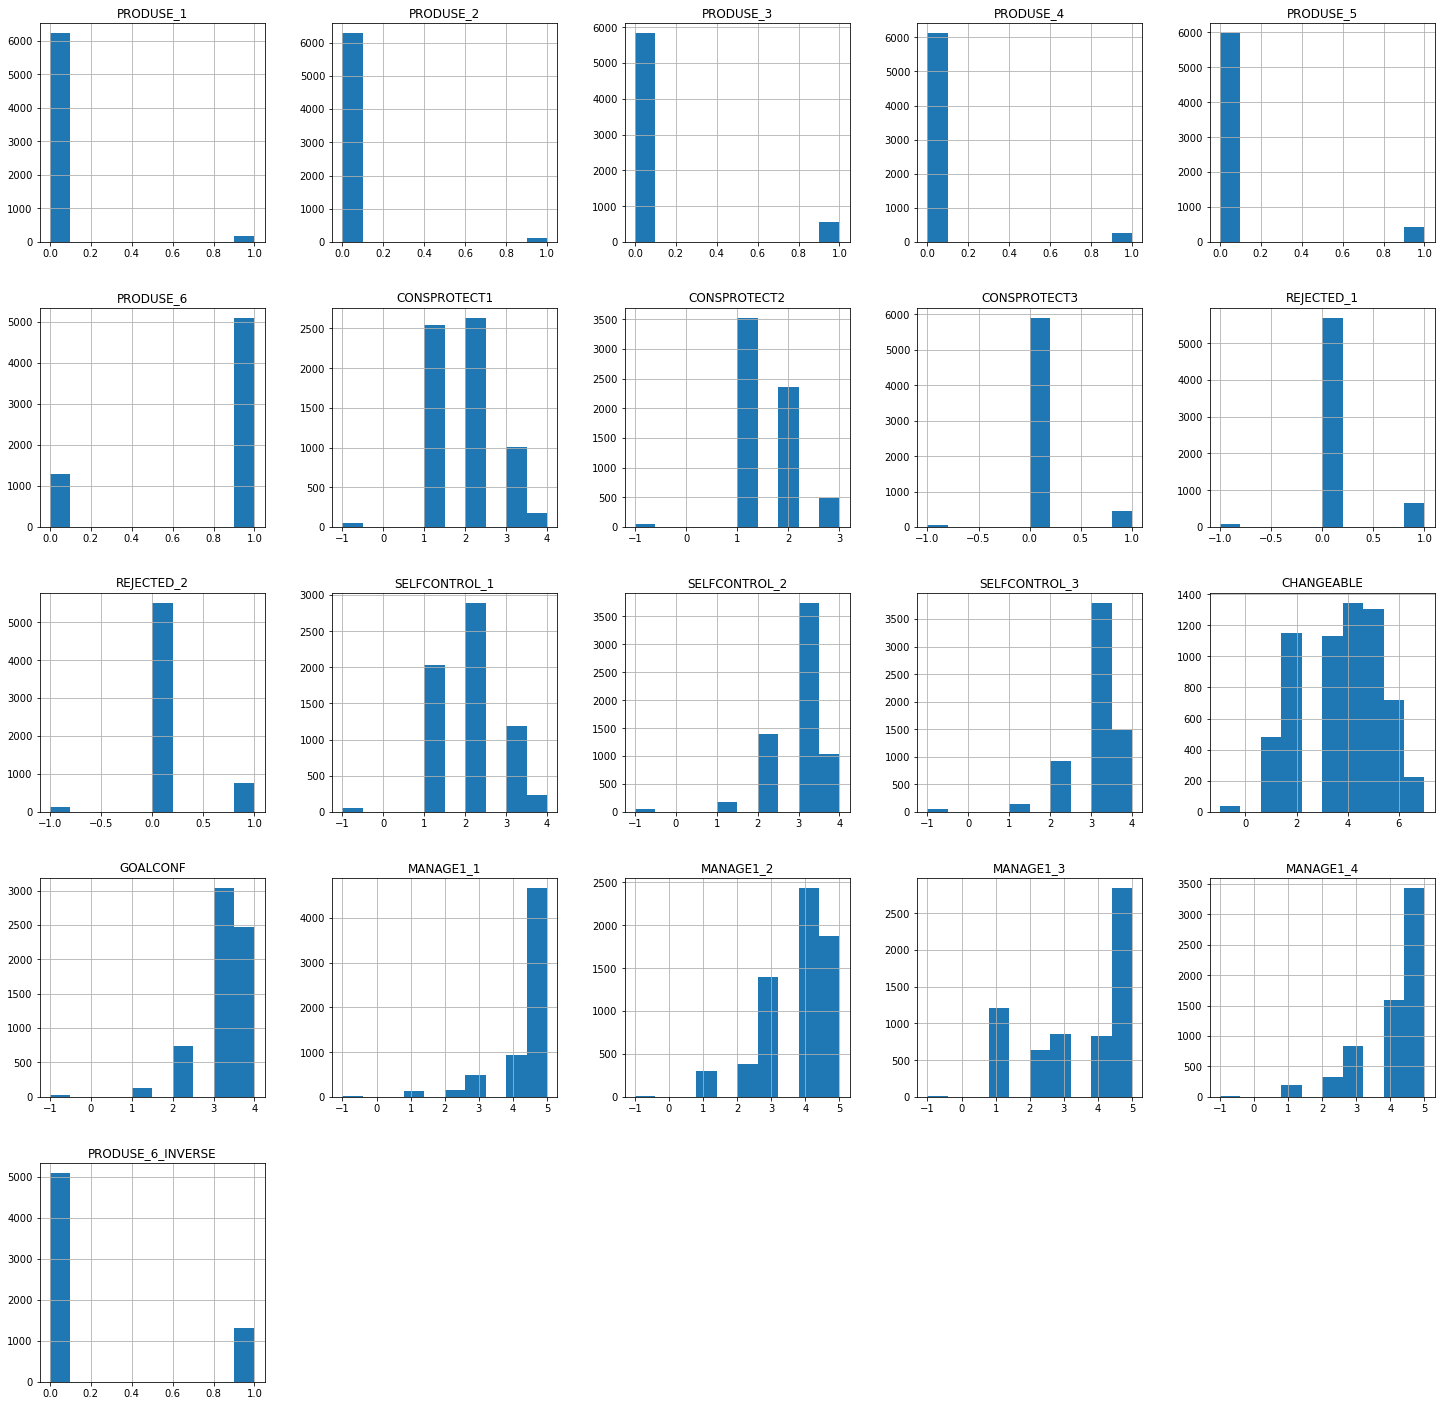

In [3]:
#Understand the data: card data
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

wellness_data_card.hist(figsize=(25,25))
plt.show()

/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 

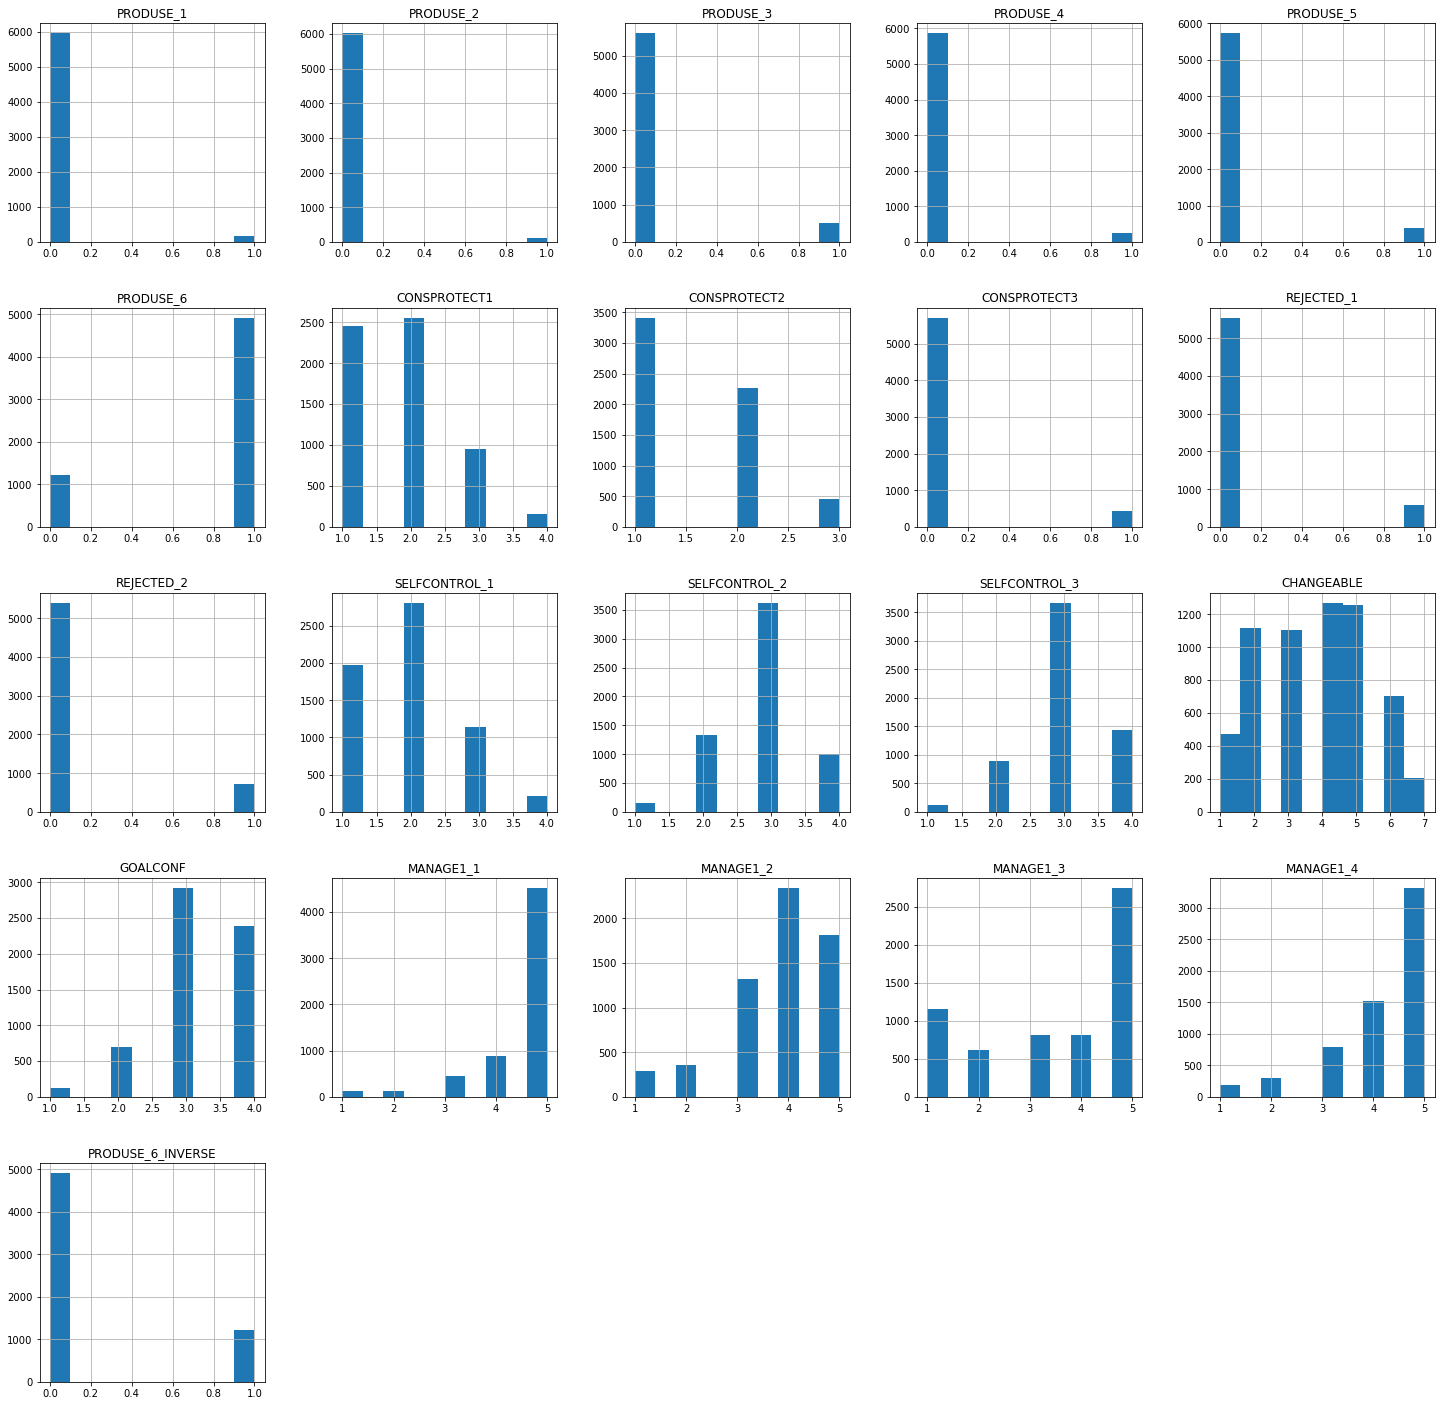

In [4]:
# clean to ensure correct variables

def clean_dataframe(df):
    REFUSED = -1
    # Cleans invalid changable rows
    
    columns = [df.PRODUSE_1, df.PRODUSE_2, df.PRODUSE_3, df.PRODUSE_4, df.PRODUSE_5, df.PRODUSE_6, df.PRODUSE_6_INVERSE,
               df.CONSPROTECT1, df.CONSPROTECT2, df.CONSPROTECT3,
       df.REJECTED_1, df.REJECTED_2, df.SELFCONTROL_1, df.SELFCONTROL_2,
       df.SELFCONTROL_3, df.CHANGEABLE, df.GOALCONF, df.MANAGE1_1, df.MANAGE1_2,
       df.MANAGE1_3, df.MANAGE1_4]
    
    for i in columns:
        df = df[i != REFUSED]
    return df

wellness_data_card_clean = clean_dataframe(wellness_data_card)


wellness_data_card_clean.hist(figsize=(25,25))
plt.show()

In [5]:
wellness_data_card_clean.describe()

,PRODUSE_1,PRODUSE_2,PRODUSE_3,PRODUSE_4,PRODUSE_5,PRODUSE_6,CONSPROTECT1,CONSPROTECT2,CONSPROTECT3,REJECTED_1,...,SELFCONTROL_1,SELFCONTROL_2,SELFCONTROL_3,CHANGEABLE,GOALCONF,MANAGE1_1,MANAGE1_2,MANAGE1_3,MANAGE1_4,PRODUSE_6_INVERSE
count,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,...,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000
mean,0.026144,0.016503,0.085294,0.042320,0.063562,0.801961,1.808333,1.518301,0.070261,0.096405,...,1.933007,2.893301,3.048039,3.757026,3.237255,4.554412,3.822549,3.552288,4.222549,0.198039
std,0.159576,0.127411,0.279342,0.201335,0.243991,0.398554,0.791994,0.631466,0.255608,0.295170,...,0.801059,0.689534,0.679092,1.585381,0.724685,0.888440,1.065534,1.571797,1.046156,0.398554
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,4.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,2.000000,3.000000,3.000000,4.000000,3.000000,5.000000,4.000000,4.000000,5.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,2.000000,3.000000,3.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,1.000000,1.000000,...,4.000000,4.000000,4.000000,7.000000,4.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics


prod1 = [i for i in wellness_data_card_clean['PRODUSE_1']] 
prod2 = [i for i in wellness_data_card_clean['PRODUSE_2']] 
prod3 = [i for i in wellness_data_card_clean['PRODUSE_3']] 
prod4 = [i for i in wellness_data_card_clean['PRODUSE_4']] 
prod5 = [i for i in wellness_data_card_clean['PRODUSE_5']]
prod6 = [i for i in wellness_data_card_clean['PRODUSE_6']]
prod6_inv = [i for i in wellness_data_card_clean['PRODUSE_6_INVERSE']]
cons1 = [i for i in wellness_data_card_clean['CONSPROTECT1']] 
cons2 = [i for i in wellness_data_card_clean['CONSPROTECT2']] 
cons3 = [i for i in wellness_data_card_clean['CONSPROTECT3']] 
rej1 = [i for i in wellness_data_card_clean['REJECTED_1']]
rej2 = [i for i in wellness_data_card_clean['REJECTED_2']] 
self1 = [i for i in wellness_data_card_clean['SELFCONTROL_1']] 
self2 = [i for i in wellness_data_card_clean['SELFCONTROL_2']] 
self3 = [i for i in wellness_data_card_clean['SELFCONTROL_3']] 
change = [i for i in wellness_data_card_clean['CHANGEABLE']]
goalconf = [i for i in wellness_data_card_clean['GOALCONF']] 
manage1 = [i for i in wellness_data_card_clean['MANAGE1_1']] 
manage2 = [i for i in wellness_data_card_clean['MANAGE1_2']] 
manage3 = [i for i in wellness_data_card_clean['MANAGE1_3']] 
manage4 = [i for i in wellness_data_card_clean['MANAGE1_4']]

X1 = [[prod1[i],
prod2[i],
prod4[i],
prod5[i],
prod6_inv[i],
cons1[i],
cons2[i],
cons3[i],
rej1[i],
rej2[i],
self1[i],
self2[i],
self3[i],
change[i],
goalconf[i],
manage1[i],
manage2[i],
manage3[i],
manage4[i]] for i in range(len(prod1))]

X = [[
prod6_inv[i],
manage1[i],
manage2[i],
manage3[i],
manage4[i]] for i in range(len(prod1))]

y = [i for i in prod3]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


models_to_check = {'SVM': SVC(gamma='auto'), 
                   'ADABoost': AdaBoostClassifier(n_estimators=100),
                  'RandomForest': RandomForestClassifier(n_estimators=100, max_depth=100)}

for model in models_to_check.keys():
    clf = models_to_check[model]
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    
    # Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
    
    print('{} Recall: '.format(model), recall_score(y_test, predictions, average='macro'))
    print('{} Accuracy: '.format(model), accuracy_score(y_test, predictions))
    print('{} F1 Score: '.format(model), f1_score(y_test, predictions, average='weighted'))
    matrix = confusion_matrix(y_test, predictions)
    print('{} Confusion Matrix: '.format(model), matrix)
    # How accurate the model is at guessing users that currently use pre-paid cards
    print('{} Pre-Paid User Accuracy'.format(model), (matrix[1][1] / (matrix[1][0] + matrix[1][1])))
    print('___________________________________________________')
    

SVM Recall:  0.599910394265233
SVM Accuracy:  0.9109477124183006
SVM F1 Score:  0.8953616371358171
SVM Confusion Matrix:  [[1091   25]
 [  84   24]]
SVM Pre-Paid User Accuracy 0.2222222222222222
___________________________________________________
ADABoost Recall:  0.6248506571087216
ADABoost Accuracy:  0.8954248366013072
ADABoost F1 Score:  0.8894451397580309
ADABoost Confusion Matrix:  [[1064   52]
 [  76   32]]
ADABoost Pre-Paid User Accuracy 0.2962962962962963
___________________________________________________
RandomForest Recall:  0.7307347670250897
RandomForest Accuracy:  0.8978758169934641
RandomForest F1 Score:  0.9022580861169494
RandomForest Confusion Matrix:  [[1042   74]
 [  51   57]]
RandomForest Pre-Paid User Accuracy 0.5277777777777778
___________________________________________________


SVM Recall:  0.6696535244922341
SVM Accuracy:  0.9084967320261438
SVM F1 Score:  0.903754957832528
SVM Confusion Matrix:  [[1071   45]
 [  67   41]]
SVM Pre-Paid User Accuracy 0.37962962962962965
SVM AUC:  0.7142904553298819
___________________________________________________
ADABoost Recall:  0.6139486260454002
ADABoost Accuracy:  0.9060457516339869
ADABoost F1 Score:  0.8946117521968917
ADABoost Confusion Matrix:  [[1081   35]
 [  80   28]]
ADABoost Pre-Paid User Accuracy 0.25925925925925924
ADABoost AUC:  0.9335756006902961
___________________________________________________
RandomForest Recall:  0.7013142174432497
RandomForest Accuracy:  0.9052287581699346
RandomForest F1 Score:  0.9048283241207526
RandomForest Confusion Matrix:  [[1059   57]
 [  59   49]]
RandomForest Pre-Paid User Accuracy 0.4537037037037037
RandomForest AUC:  0.9372510951812028
___________________________________________________


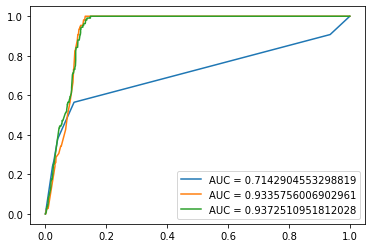

In [27]:
# This cell has the best Hyperparamterer Tuning, and has AUC curve added

models_to_check = {'SVM': SVC(gamma=100, probability=True), 
                   'ADABoost': AdaBoostClassifier(n_estimators=15),
                  'RandomForest': RandomForestClassifier(n_estimators=125, max_depth=125)}

for model in models_to_check.keys():
    clf = models_to_check[model]
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    
    # AUC Curve Variables
    model_RF = clf.fit(X_train, y_train)
    y_pred_proba = model_RF.predict_proba(X_test)[:, 1]
    fpr ,tpr, t = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)


    # Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
    print('{} Recall: '.format(model), recall_score(y_test, predictions, average='macro'))
    print('{} Accuracy: '.format(model), accuracy_score(y_test, predictions))
    print('{} F1 Score: '.format(model), f1_score(y_test, predictions, average='weighted'))
    matrix = confusion_matrix(y_test, predictions)
    print('{} Confusion Matrix: '.format(model), matrix)
    # How accurate the model is at guessing users that currently use pre-paid cards
    print('{} Pre-Paid User Accuracy'.format(model), (matrix[1][1] / (matrix[1][0] + matrix[1][1])))

    # Plots AUC curve
    print('{} AUC: '.format(model), auc)
    plt.plot(fpr,tpr,label = 'AUC = ' + str(auc))
    plt.legend()
    plt.show
    print('___________________________________________________')
    

Target:
#At risk of taking on a product that has excessive fees and that they can end up overpaying for.

PRODUSE_1 Used payday loan or cash advance loan

PRODUSE_2 Used pawn loan or auto title loan


Features:

Poor Self Control: 

SELFCONTROL_1 I often act without thinking through all the alternatives

SELFCONTROL_2 I am good at resisting temptation

SELFCONTROL_3 I am able to work diligently toward long-term goals


Manage Finances:

MANAGE1_1 Paid all your bills on time

MANAGE1_2 Stayed within your budget or spending plan

MANAGE1_3 Paid off credit card balance in full each month

MANAGE1_4 Checked your statements, bills and receipts to make sure there were no errors


Poverty vs Not in Poverty:

fpl Poverty status

FWB1_1 I could handle a major unexpected expense

FWB1_2 I am securing my financial future

FWB1_3 Because of my money situation...I will never have the things I want in life

FWB1_4 I can enjoy life because of the way I’m managing my money

FWB1_5 I am just getting by financially

FWB1_6 I am concerned that the money I have or will save won’t last

FWB2_1 Giving a gift...would put a strain on my finances for the month

FWB2_2 I have money left over at the end of the month

FWB2_3 I am behind with my financesSurvey item

FWB2_4 My finances control my life

In [28]:
# Get all the data from UCI_Credit_Card file
import pandas as pd
wellness_cfpb = pd.read_csv('CFPB-financial-wellness-data.csv',  header=0)
wellness_cfpb.head()

cfpb_select = ['PRODUSE_1','PRODUSE_2','SELFCONTROL_1','SELFCONTROL_2','SELFCONTROL_3',
               'MANAGE1_1','MANAGE1_2','MANAGE1_3','MANAGE1_4','fpl','FWB1_1', 'FWB1_2',
               'FWB1_3','FWB1_4','FWB1_5','FWB1_6','FWB2_1','FWB2_2','FWB2_3','FWB2_4']

wellness_data_cfpb = wellness_cfpb[cfpb_select]

wellness_data_cfpb.head()

l1 = [i for i in wellness_data_card['PRODUSE_1']]
l2 = [i for i in wellness_data_card['PRODUSE_2']]

used_hi_list = []
for i in range(len(l1)):
    used_hi_list.append([l1[i],l2[i]])
    
used_hi_list
used_hi_product = [1 if 1 in i else 0 for i in used_hi_list]

wellness_data_cfpb['USED_HI_PRODUCT'] = used_hi_product




/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/opt/anaconda3/envs/datalore-user/lib/py

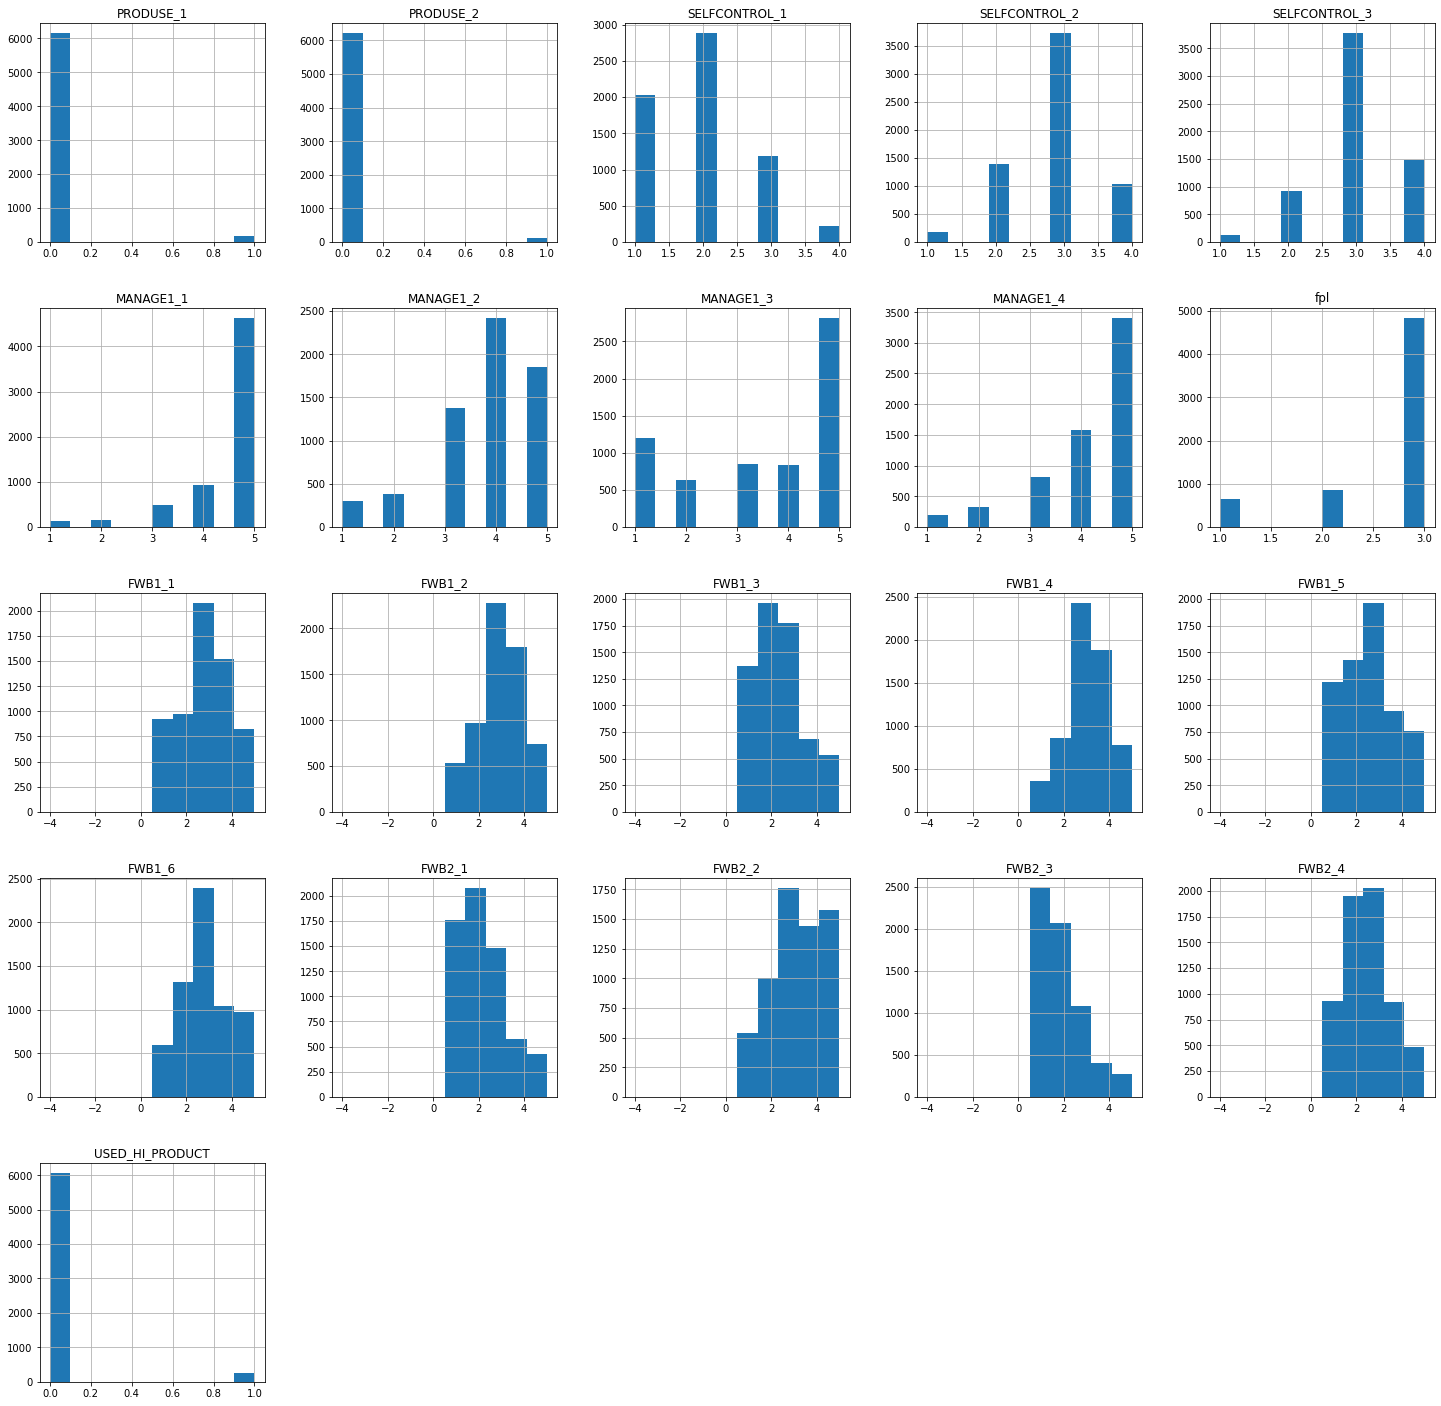

In [29]:
def clean_dataframe(df):
    REFUSED = -1
    # Cleans invalid changable rows
    
    columns = [df.PRODUSE_1,df.PRODUSE_2,df.USED_HI_PRODUCT, df.SELFCONTROL_1,df.SELFCONTROL_2,df.SELFCONTROL_3,
               df.MANAGE1_1,df.MANAGE1_2,df.MANAGE1_3,df.MANAGE1_4,df.fpl,df.FWB1_1, df.FWB1_2,
               df.FWB1_3,df.FWB1_4,df.FWB1_5,df.FWB1_6,df.FWB2_1,df.FWB2_2,df.FWB2_3,df.FWB2_4]
    for i in columns:
        df = df[i != REFUSED]
    return df

wellness_data_cfpb_clean = clean_dataframe(wellness_data_cfpb)


wellness_data_cfpb_clean.hist(figsize=(25,25))
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score


prod1 = [i for i in wellness_data_cfpb_clean['PRODUSE_1']] 
prod2 = [i for i in wellness_data_cfpb_clean['PRODUSE_2']]

used_hi_product = [i for i in wellness_data_cfpb_clean['USED_HI_PRODUCT']]

sc1 = [i for i in wellness_data_cfpb_clean['SELFCONTROL_1']] 
sc2 = [i for i in wellness_data_cfpb_clean['SELFCONTROL_2']] 
sc3 = [i for i in wellness_data_cfpb_clean['SELFCONTROL_3']]

man_1 = [i for i in wellness_data_cfpb_clean['MANAGE1_1']]
man_2 = [i for i in wellness_data_cfpb_clean['MANAGE1_2']]
man_3 = [i for i in wellness_data_cfpb_clean['MANAGE1_3']]
man_4 = [i for i in wellness_data_cfpb_clean['MANAGE1_4']]

fpl = [i for i in wellness_data_cfpb_clean['fpl']]

FWB1_1 = [i for i in wellness_data_cfpb_clean['FWB1_1']]
FWB1_2 = [i for i in wellness_data_cfpb_clean['FWB1_2']]
FWB1_3 = [i for i in wellness_data_cfpb_clean['FWB1_3']]
FWB1_4 = [i for i in wellness_data_cfpb_clean['FWB1_4']]
FWB1_5 = [i for i in wellness_data_cfpb_clean['FWB1_5']]
FWB1_6 = [i for i in wellness_data_cfpb_clean['FWB1_6']]

FWB2_1 = [i for i in wellness_data_cfpb_clean['FWB2_1']]
FWB2_2 = [i for i in wellness_data_cfpb_clean['FWB2_2']]
FWB2_3 = [i for i in wellness_data_cfpb_clean['FWB2_3']]
FWB2_4 = [i for i in wellness_data_cfpb_clean['FWB2_4']]

# Full

X1 = [[FWB1_1[i],FWB1_2[i],FWB1_3[i],FWB1_4[i],FWB1_5[i],FWB1_6[i],
 FWB2_1[i],FWB2_2[i],FWB2_3[i],FWB2_4[i],sc1[i],sc2[i],sc3[i],
 man_1[i],man_2[i],man_3[i],man_4[i],fpl[i]] for i in range(len(used_hi_product))]

# Poverty

X2 = [[FWB1_1[i],FWB1_2[i],FWB1_3[i],FWB1_4[i],FWB1_5[i],FWB1_6[i],
 FWB2_1[i],FWB2_2[i],FWB2_3[i],FWB2_4[i],fpl[i]] for i in range(len(used_hi_product))]

# Self-Control

X3 = [[sc1[i],sc2[i],sc3[i]] for i in range(len(used_hi_product))]

# Management (Best results here)

X4 = [[man_1[i],man_2[i],man_3[i],man_4[i],fpl[i]] for i in range(len(used_hi_product))]

y = [[used_hi_product[i]] for i in range(len(used_hi_product))]

X = X4

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


models_to_check = {'SVM': SVC(gamma='auto'), 
                   'ADABoost': AdaBoostClassifier(n_estimators=100),
                  'RandomForest': RandomForestClassifier(n_estimators=100, max_depth=100)}

for model in models_to_check.keys():
    clf = models_to_check[model]
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    
    # Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
    
    print('{} Recall: '.format(model), recall_score(y_test, predictions, average='macro'))
    print('{} Accuracy: '.format(model), accuracy_score(y_test, predictions))
    print('{} F1 Score: '.format(model), f1_score(y_test, predictions, average='weighted'))
    matrix = confusion_matrix(y_test, predictions)
    print('{} Confusion Matrix: '.format(model), matrix)
    print('{} High Interest Product User Accuracy'.format(model), (matrix[1][1] / (matrix[1][0] + matrix[1][1])))
    print('___________________________________________________')
    

SVM Recall:  0.5
SVM Accuracy:  0.9596837944664032
SVM F1 Score:  0.9399404005503942
SVM Confusion Matrix:  [[1214    0]
 [  51    0]]
SVM High Interest Product User Accuracy 0.0
___________________________________________________
ADABoost Recall:  0.49917627677100496
ADABoost Accuracy:  0.958102766798419
ADABoost F1 Score:  0.9391495832808079
ADABoost Confusion Matrix:  [[1212    2]
 [  51    0]]
ADABoost High Interest Product User Accuracy 0.0
___________________________________________________
RandomForest Recall:  0.513429918919792
RandomForest Accuracy:  0.9494071146245059
RandomForest F1 Score:  0.9371082348937044
RandomForest Confusion Matrix:  [[1199   15]
 [  49    2]]
RandomForest High Interest Product User Accuracy 0.0392156862745098
___________________________________________________


/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/ipykernel_launcher.py:71: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


SVM Recall:  0.5159010886067772
SVM Accuracy:  0.9541501976284585
SVM F1 Score:  0.939731493113123
SVM Confusion Matrix:  [[1205    9]
 [  49    2]]
SVM Pre-Paid User Accuracy 0.0392156862745098
SVM AUC:  0.562619116839487
___________________________________________________
ADABoost Recall:  0.5
ADABoost Accuracy:  0.9596837944664032
ADABoost F1 Score:  0.9399404005503942
ADABoost Confusion Matrix:  [[1214    0]
 [  51    0]]
ADABoost Pre-Paid User Accuracy 0.0
ADABoost AUC:  0.7444842846529056
___________________________________________________
RandomForest Recall:  0.5236457021029169
RandomForest Accuracy:  0.9509881422924901
RandomForest F1 Score:  0.9390736025532761
RandomForest Confusion Matrix:  [[1200   14]
 [  48    3]]
RandomForest Pre-Paid User Accuracy 0.058823529411764705
RandomForest AUC:  0.5495929838162612
___________________________________________________


/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

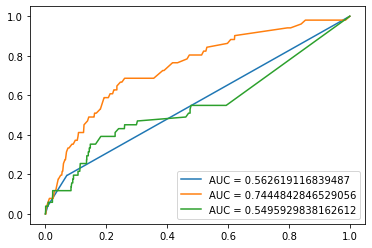

In [43]:
# This cell has the best Hyperparamterer Tuning, and has AUC curve added

models_to_check = {'SVM': SVC(gamma=100, probability=True), 
                   'ADABoost': AdaBoostClassifier(n_estimators=15),
                  'RandomForest': RandomForestClassifier(n_estimators=125, max_depth=125)}

for model in models_to_check.keys():
    clf = models_to_check[model]
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    
    # AUC Curve Variables
    model_RF = clf.fit(X_train, y_train)
    y_pred_proba = model_RF.predict_proba(X_test)[:, 1]
    fpr ,tpr, t = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)


    # Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
    print('{} Recall: '.format(model), recall_score(y_test, predictions, average='macro'))
    print('{} Accuracy: '.format(model), accuracy_score(y_test, predictions))
    print('{} F1 Score: '.format(model), f1_score(y_test, predictions, average='weighted'))
    matrix = confusion_matrix(y_test, predictions)
    print('{} Confusion Matrix: '.format(model), matrix)
    # How accurate the model is at guessing users that currently use pre-paid cards
    print('{} Pre-Paid User Accuracy'.format(model), (matrix[1][1] / (matrix[1][0] + matrix[1][1])))

    # Plots AUC curve
    print('{} AUC: '.format(model), auc)
    plt.plot(fpr,tpr,label = 'AUC = ' + str(auc))
    plt.legend()
    plt.show
    print('___________________________________________________')
    